# Vectors BEGINNER

Esta tabla contiene la información de las expresiones del tipo vector (Listas, diccionarios, etc).

## 1 - Obtencion de datos

In [1]:
import matplotlib.pyplot as plt
from notebooks_utils import *
from domains import *

TARGET_FEATURE = 'vector__expertise_level'
TARGET_CLASS = 'BEGINNER'
full_table = get_data('vectors')

instances_for_class_low = len(full_table[full_table[TARGET_FEATURE] == "BEGINNER"])
instances_for_class_high = len(full_table[full_table[TARGET_FEATURE] == "EXPERT"])

print(f"The dataset contains {instances_for_class_low} ({instances_for_class_low/len(full_table)*100:.4}%) instances for BEGINNER class and {instances_for_class_high} ({instances_for_class_high/len(full_table)*100:.4}%) for EXPERT class.")

2024-07-04 19:40:59.317936 Data cache files found ...
2024-07-04 19:40:59.371446 Data cache files successfully loaded!!
The dataset contains 121764 (34.63%) instances for BEGINNER class and 229900 (65.37%) for EXPERT class.


In [2]:
full_table = full_table[full_table[TARGET_FEATURE] == TARGET_CLASS]

# Table name, features and target.
TABLE_NAME = 'vectors'
TABLE_FEATURES = ['vector__category', 'vector__number_of_elements', 'vector__homogeneous']

# Load features and target.
X = full_table[TABLE_FEATURES]

# Print information about the loaded table.
print(f'Features shape: {X.shape}')

print(f'As we can see the downloaded data contains a total of {X.shape[0]} instances. For each instance we have {X.shape[1]} attributes.')

Features shape: (121764, 3)
As we can see the downloaded data contains a total of 121764 instances. For each instance we have 3 attributes.


## 2 - Exploracion de datos

Una vez tenemos nuestra tabla en un dataframe el siguiente paso es explorarla para ver qué tipo de información contiene.

In [3]:
print(X.info())

<class 'pandas.core.frame.DataFrame'>
Index: 121764 entries, 0 to 121763
Data columns (total 3 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   vector__category            121764 non-null  object
 1   vector__number_of_elements  121764 non-null  int64 
 2   vector__homogeneous         121764 non-null  bool  
dtypes: bool(1), int64(1), object(1)
memory usage: 2.9+ MB
None


Cómo podemos ver la tabla está compuesta por 1 variable numérica, 1 variables boleanas y 2 de tipo objeto.

### 2.1 - Valores Nulos 
Miramos si alguna de las variables que contiene la tabla contiene algún valor que sea nulo.

In [4]:
X.isnull().sum()

vector__category              0
vector__number_of_elements    0
vector__homogeneous           0
dtype: int64

In [5]:
print_empty_cols(X)

vector__category
----------------
0 instancias no tienen un valor para la columna vector__category


vector__number_of_elements
--------------------------
0 instancias no tienen un valor para la columna vector__number_of_elements


vector__homogeneous
-------------------
0 instancias no tienen un valor para la columna vector__homogeneous




### 2.2 - Describimos los valores de las variables de la tabla.

In [6]:
np.transpose(X.describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int']))

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
vector__category,121764,4,TupleLiteral,88385,NaN,NaN,NaN,NaN,NaN,NaN,NaN
vector__number_of_elements,121764.0,NaN,NaN,NaN,6.308359,73.071304,0.0,2.0,2.0,3.0,5376.0
vector__homogeneous,121764,2,False,91365,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Vamos a discretizar las variables numericas, agrupando conjuntos de valores en categorias, para hacer un análisis de los datos. Para cada variable es necesario ver la distribucion de lo valores para hacer los bins (categorias).

In [7]:
# DISCRETIZATION
X_copy = X.copy()

discretized_columns = {
    "vector__number_of_elements": [(0.0, 2.0), (2.0, 2.0), (2.0, 3.0), (3.0, inf)], # min: 0 ; max: 14519
}

discretize_columns(X_copy, discretized_columns)
    
# SINGLE FEATURE
print("--- SINGLE FEATURE ---")
print(get_statistics(X_copy, ['vector__number_of_elements'], 10))
print(get_statistics(full_table, ['vector__category'], 10))
print(get_statistics(X_copy, ['vector__homogeneous'], 10))

# 2 FEATURES
print("--- TWO FEATURES ---")
#print(get_statistics(X_copy, ['variable__is_magic', 'variable__name_convention_Discard'], 10))
#print(get_statistics(X_copy, ['functiondef__number_of_characters', 'functiondef__name_convention_Lower'], 10))

# 3 FEATURES
print("--- THREE FEATURES ---")
#print(get_statistics(X_copy, ['module__class_defs_pct', 'module__function_defs_pct', 'module__enum_defs_pct'], 10))

--- SINGLE FEATURE ---
vector__number_of_elements  count  percentage
                 [3.0_inf]  56308   46.243553
                 [2.0_2.0]  46276   38.004665
                 [0.0_2.0)  19180   15.751782

 vector__category  count  percentage
     TupleLiteral  88385   72.587136
      ListLiteral  23156   19.017115
DictionaryLiteral   9817    8.062317
       SetLiteral    406    0.333432

 vector__homogeneous  count  percentage
               False  91365   75.034493
                True  30399   24.965507

--- TWO FEATURES ---
--- THREE FEATURES ---


In [8]:
def normalize_datatypes(X:pd.DataFrame) -> (pd.DataFrame, [str]):
    X = pd.get_dummies(X)
    X = X.astype('float32')        
    columns_names = X.columns.tolist()
    return X, columns_names

X, TABLE_FEATURES = normalize_datatypes(X)
# Print information about the loaded table
print(f'Features shape: {X.shape}')

Features shape: (121764, 6)


#### Muestra la matriz de correlación de Spearman entre las variables de la tabla.

<Axes: >

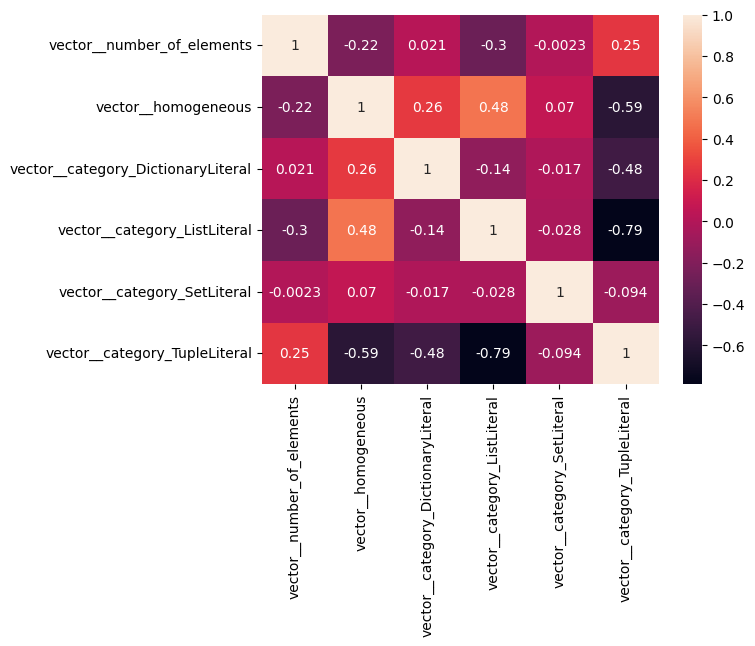

In [9]:
sns.heatmap(X.corr(method='spearman'), annot=True)

## 3 - Detección de valores atípicos (outliers)
## Univariate
## Analisis detallado de variables
Para cada una de las 3 variables (1 numerica, 1 booleanas y 1 categorica) se hara un analisis detallado

### Variable homogeneous (1/3)
Esta variable es de tipo booleano y representa si todos los elementos de la lista son del mismo tipo.

<Axes: xlabel='vector__homogeneous', ylabel='Count'>

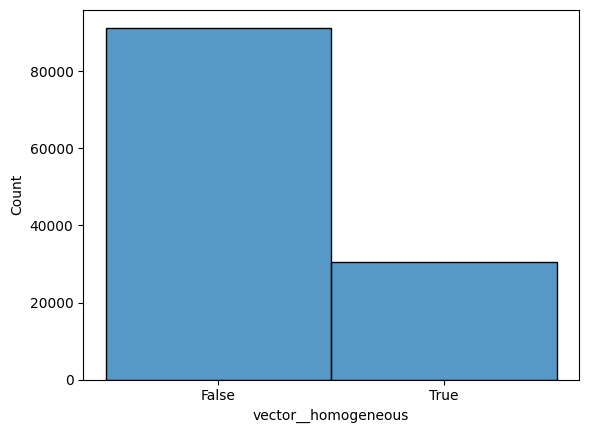

In [10]:
plt.xticks([0, 1], ['False', 'True'])
sns.histplot(X['vector__homogeneous'], discrete=True)

In [11]:
num_true_values = len(X[X['vector__homogeneous'] == True])
num_false_values = len(X[X['vector__homogeneous'] == False])
std = X['vector__homogeneous'].std()
freq_true = len(X[X['vector__homogeneous'] == True]) / len(X['vector__homogeneous'])
freq_false = len(X[X['vector__homogeneous'] == False]) / len(X['vector__homogeneous'])
print(f'La variable homogeneous contiene {num_true_values} valores verdaderos y {num_false_values} valores falsos. Y, la desviación típica es de {std}')
print(f'La frecuencia con la que programa puede tener la variable homogeneous a True es {freq_true}.')
print(f'La frecuencia con la que programa puede tener la variable homogeneous a False es {freq_false}.')

La variable homogeneous contiene 30399 valores verdaderos y 91365 valores falsos. Y, la desviación típica es de 0.4328151345252991
La frecuencia con la que programa puede tener la variable homogeneous a True es 0.2496550704641766.
La frecuencia con la que programa puede tener la variable homogeneous a False es 0.7503449295358234.


In [12]:
possible_values = [True, False]
print_frequency_anal_for_cat_var(X, 'vector__homogeneous', possible_values)

La variable vector__homogeneous contiene 2 valores distintos.
El umbral de outlier es de 0.1%
La variable vector__homogeneous toma el valor de 0.0 en un 75.03% de los items.
La variable vector__homogeneous toma el valor de 1.0 en un 24.97% de los items.


In [13]:
X[X['vector__homogeneous'] == True].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int'])

,vector__number_of_elements,vector__homogeneous,vector__category_DictionaryLiteral,vector__category_ListLiteral,vector__category_SetLiteral,vector__category_TupleLiteral
count,30399.000000,30399.0,30399.000000,30399.000000,30399.000000,30399.000000
mean,15.373367,1.0,0.205237,0.515872,0.010296,0.268594
std,145.127655,0.0,0.403881,0.499756,0.100949,0.443236
min,0.000000,1.0,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.0,0.000000,0.000000,0.000000,0.000000
50%,2.000000,1.0,0.000000,1.000000,0.000000,0.000000
75%,3.000000,1.0,0.000000,1.000000,0.000000,1.000000
max,5376.000000,1.0,1.000000,1.000000,1.000000,1.000000


### Variable number_of_elements (2/3)
Esta variable representa el número de elementos en la lista. Como vimos en la descripción de la tabla esta varibale adopta valores en el rango 0 - 5376. Con una media de 6.3.

<Axes: ylabel='vector__number_of_elements'>

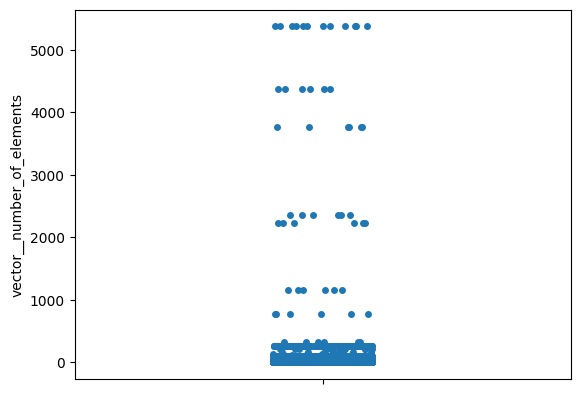

In [14]:
sns.stripplot(X['vector__number_of_elements'])

In [15]:
print_outliers_for_df_column(X, 'vector__number_of_elements')

El coeficiente MC (Medcouple Coefficient) de balanceo es: 0.9755271808458917
Rango valores atípicos extremos (Tukey): [-1.0,6.0]
Rango valores atípicos leves (Tukey): [0.5,4.5]
Rango valores atípicos extremos (Fixed BoxPlot): [1.9506530848584323,77.26010268255112]
-3.0IQR: 0 instancias tienen un valor para vector__number_of_elements inferior a -1.0 (Q1-3*IQR) para vector__number_of_elements. Representando un 0.0% del total de instancias.
-1.5IQR: 12388 instancias tienen un valor para vector__number_of_elements inferior a 0.5 (Q1-1.5*IQR) para vector__number_of_elements. Representando un 10.17% del total de instancias.
+1.5IQR: 10222 instancias tienen un valor para vector__number_of_elements superior a 4.5 (Q3+1.5*IQR) para vector__number_of_elements. Representando un 8.395% del total de instancias.
+3.0IQR: 7185 instancias tienen un valor para vector__number_of_elements superior a 6.0 (Q3-3*IQR) para vector__number_of_elements. Representando un 5.901% del total de instancias.
L: 19180 

Describimos los valores de las variables de la tabla, cuando el valor de la variable es mayor que 77 (Con un MC de 97 usamos U)

In [16]:
X[X['vector__number_of_elements'] > 77].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int'])

,vector__number_of_elements,vector__homogeneous,vector__category_DictionaryLiteral,vector__category_ListLiteral,vector__category_SetLiteral,vector__category_TupleLiteral
count,1266.000000,1266.000000,1266.000000,1266.000000,1266.0,1266.000000
mean,234.515793,0.596367,0.090047,0.398104,0.0,0.511848
std,673.036072,0.490819,0.286363,0.489701,0.0,0.500057
min,78.000000,0.000000,0.000000,0.000000,0.0,0.000000
25%,83.000000,0.000000,0.000000,0.000000,0.0,0.000000
50%,100.000000,1.000000,0.000000,0.000000,0.0,1.000000
75%,100.000000,1.000000,0.000000,1.000000,0.0,1.000000
max,5376.000000,1.000000,1.000000,1.000000,0.0,1.000000


### Variable category (3/3)
Esta variable es de tipo categorica y representa el tipo del vector.

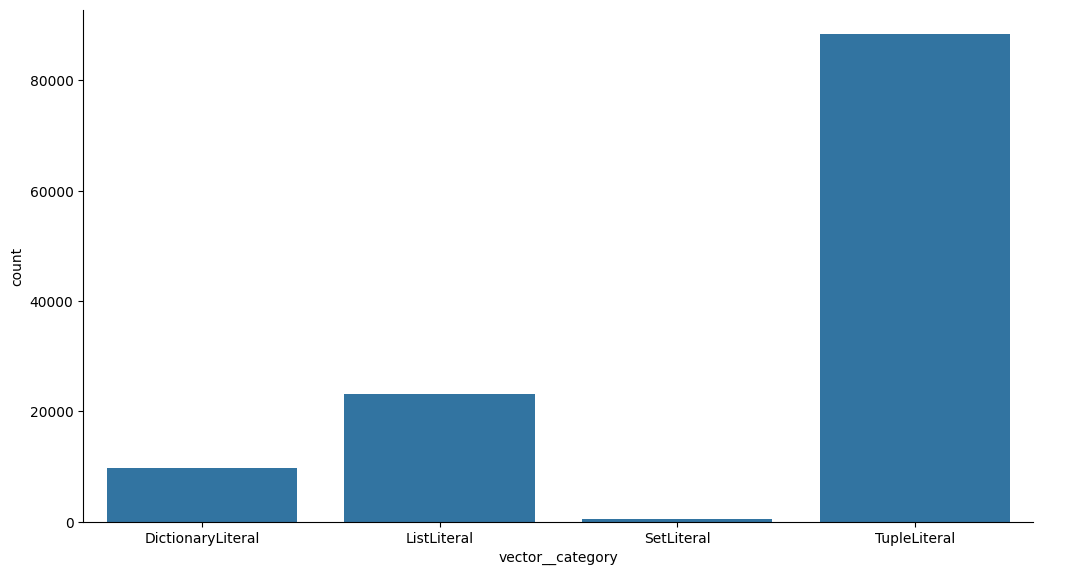

In [17]:
print_categorical_histogram(full_table, 'vector__category')

In [18]:
print_frequency_anal_for_cat_var(full_table, 'vector__category')

La variable vector__category contiene 4 valores distintos.
El umbral de outlier es de 0.05%
La variable vector__category toma el valor de TupleLiteral en un 72.59% de los items.
La variable vector__category toma el valor de ListLiteral en un 19.02% de los items.
La variable vector__category toma el valor de DictionaryLiteral en un 8.062% de los items.
La variable vector__category toma el valor de SetLiteral en un 0.3334% de los items.


In [19]:
print_values_usage_for_cat_var(full_table, 'vector__category', VECTOR_CATEGORY_VALUES)

La variable vector__category puede tomar 4 valores distintos
	4 (100.0%) valores utilizados
	0 (0.0%) valores NO utilizados


## Multivariate

Isolation forest algorithm

In [20]:
from sklearn.ensemble import  IsolationForest

CONTAMINATION_FACTOR = 0.0012
isof_model = IsolationForest(contamination=CONTAMINATION_FACTOR, random_state=0)
isof_prediction = isof_model.fit_predict(X.values)
mask = isof_prediction == -1
full_table.loc[X.index[mask]]

,vector__category,vector__number_of_elements,vector__homogeneous,vector__expertise_level
2225,TupleLiteral,1165,True,BEGINNER
10669,TupleLiteral,256,True,BEGINNER
10673,TupleLiteral,256,True,BEGINNER
10677,TupleLiteral,256,True,BEGINNER
10681,TupleLiteral,256,True,BEGINNER
...,...,...,...,...
114623,TupleLiteral,4368,True,BEGINNER
114628,TupleLiteral,256,False,BEGINNER
114633,TupleLiteral,5376,True,BEGINNER
116025,TupleLiteral,323,False,BEGINNER


### IMPORTANTE
Revisar los outliers detectados.

In [21]:
# Outliers
np.transpose(X[mask].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int']))

,count,mean,std,min,25%,50%,75%,max
vector__number_of_elements,145.0,1115.075806,1695.814209,112.0,256.0,256.0,323.0,5376.0
vector__homogeneous,145.0,0.827586,0.379049,0.0,1.0,1.0,1.0,1.0
vector__category_DictionaryLiteral,145.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
vector__category_ListLiteral,145.0,0.006897,0.083045,0.0,0.0,0.0,0.0,1.0
vector__category_SetLiteral,145.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
vector__category_TupleLiteral,145.0,0.993103,0.083045,0.0,1.0,1.0,1.0,1.0


In [22]:
# Non-Outliers
np.transpose(X[~mask].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int']))

,count,mean,std,min,25%,50%,75%,max
vector__number_of_elements,121619.0,4.986433,21.755041,0.0,2.0,2.0,3.0,2231.0
vector__homogeneous,121619.0,0.248966,0.432416,0.0,0.0,0.0,0.0,1.0
vector__category_DictionaryLiteral,121619.0,0.080719,0.272405,0.0,0.0,0.0,0.0,1.0
vector__category_ListLiteral,121619.0,0.190390,0.392610,0.0,0.0,0.0,0.0,1.0
vector__category_SetLiteral,121619.0,0.003338,0.057682,0.0,0.0,0.0,0.0,1.0
vector__category_TupleLiteral,121619.0,0.725553,0.446237,0.0,0.0,1.0,1.0,1.0
